In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , classification_report 

import  tensorflow as tf 


In [22]:
df = pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv")

In [23]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2


# Data Preprocessing

In [24]:
df.isnull().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel0780    0
pixel0781    0
pixel0782    0
pixel0783    0
label        0
Length: 785, dtype: int64

In [25]:
X = df.drop('label' , axis = 1).copy()
y = df['label'].copy()

In [26]:
y.unique()

array([2, 4, 3, 6, 5, 1, 0])

**There are 7 possible labesl**:

- 0  : nv - Melanocytic nevi

- 1 : mel - Melanoma

- 2 : bkl - Benign Keratosis -like lesions

- 3 : bcc - Basal cell carcinoma

- 4: akiec - Actinix keratoses and intraepithelial carcinoma/ Bowen's disease

- 5: vasc - Vasular lesions

- 6 : df - Dermatofibroma

In [27]:
y.value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [28]:
label_mapping = {
    0 : 'nv' , 
    1 : 'mel' ,
    2 : 'bkl' ,
    3 : 'bcc' , 
    4 : 'akiec' ,
    5 : 'vasc' ,
    6 : 'df'
}

In [29]:
# Rescaling the pixel values between 0 and 1 . 

X = X/ 255
X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,0.662745,0.670588,0.666667,0.694118,0.709804,0.713725,0.709804,0.725490,0.760784,0.752941,...,0.690196,0.721569,0.729412,0.725490,0.705882,0.615686,0.549020,0.549020,0.623529,0.647059
1,0.074510,0.223529,0.411765,0.549020,0.584314,0.580392,0.564706,0.607843,0.666667,0.666667,...,0.709804,0.674510,0.686275,0.627451,0.564706,0.447059,0.349020,0.184314,0.070588,0.070588
2,0.607843,0.639216,0.631373,0.654902,0.654902,0.674510,0.607843,0.596078,0.647059,0.686275,...,0.635294,0.639216,0.698039,0.615686,0.650980,0.654902,0.580392,0.552941,0.533333,0.450980
3,0.098039,0.278431,0.454902,0.545098,0.533333,0.600000,0.580392,0.631373,0.674510,0.635294,...,0.556863,0.490196,0.529412,0.541176,0.537255,0.435294,0.278431,0.125490,0.062745,0.062745
4,0.505882,0.635294,0.709804,0.768627,0.803922,0.815686,0.803922,0.835294,0.882353,0.878431,...,0.827451,0.823529,0.772549,0.674510,0.745098,0.764706,0.756863,0.709804,0.576471,0.345098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.674510,0.670588,0.678431,0.686275,0.643137,0.733333,0.811765,0.823529,0.815686,0.807843,...,0.823529,0.823529,0.850980,0.866667,0.819608,0.725490,0.733333,0.752941,0.752941,0.752941
10011,0.007843,0.133333,0.423529,0.454902,0.447059,0.466667,0.513725,0.545098,0.545098,0.568627,...,0.721569,0.678431,0.662745,0.658824,0.658824,0.560784,0.541176,0.325490,0.090196,0.011765
10012,0.478431,0.603922,0.635294,0.666667,0.701961,0.772549,0.784314,0.764706,0.792157,0.780392,...,0.874510,0.866667,0.843137,0.803922,0.733333,0.819608,0.776471,0.733333,0.643137,0.611765
10013,0.537255,0.560784,0.552941,0.545098,0.576471,0.596078,0.607843,0.596078,0.607843,0.623529,...,0.698039,0.674510,0.670588,0.686275,0.717647,0.694118,0.666667,0.662745,0.650980,0.666667


In [30]:
# Reshaping 

X = np.array(X)
print(X.shape)

(10015, 784)


In [31]:
X = X.reshape(-1 , 28 , 28 , 1 )
print(X.shape)

(10015, 28, 28, 1)


In [48]:
# Visualizing 

sample_data = pd.Series(list(zip(X, y))).sample(9)

sample_X = np.stack(np.array(sample_data.apply(lambda x: x[0])))
sample_y = np.array(sample_data.apply(lambda x: x[1]))

In [49]:
(sample_X).shape

(9, 28, 28, 1)

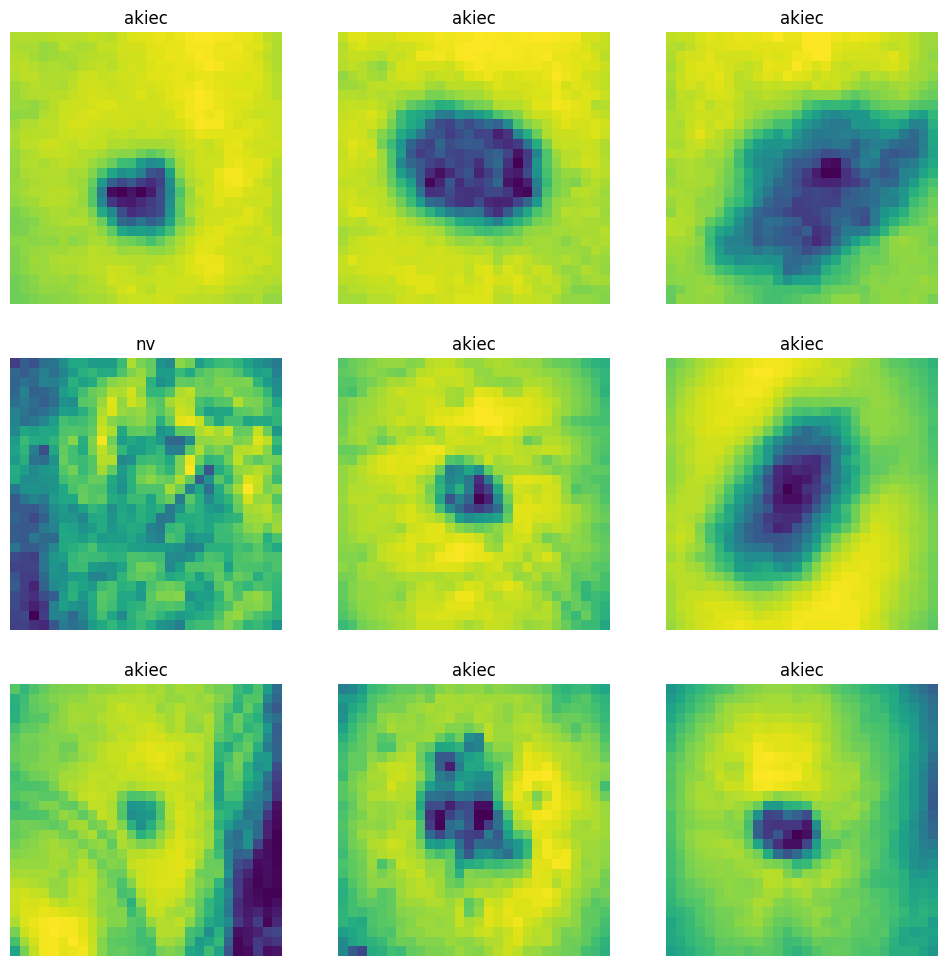

In [50]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(sample_X[i]))
    img_label = label_mapping[sample_y[i]]
    plt.title(img_label)
    plt.axis("off")

plt.show()

# Train - Test - split

In [51]:
X_train ,X_test , y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state = 42)

# Model Training 

I0000 00:00:1754201966.059598      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool3 (MaxPooling2D)         │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool                         │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,751 (92.78 KB)

 Trainable params: 23,751 (92.78 KB)

 Non-trainable params: 0 (0.00 B)

None


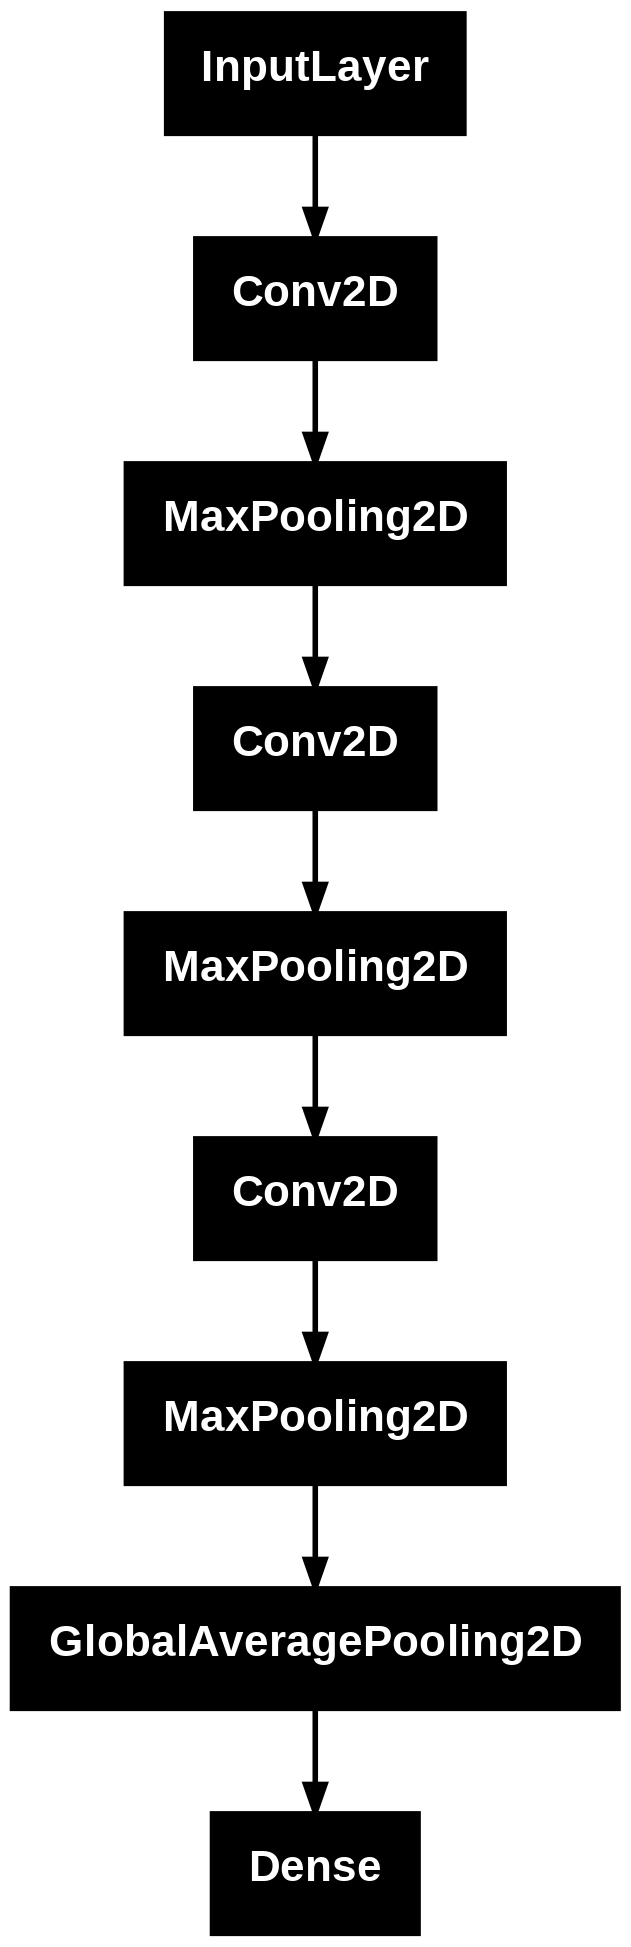

In [52]:
inputs = tf.keras.Input(shape=(28, 28, 1), name='input')

conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, name='conv1')(inputs)
maxpool1 = tf.keras.layers.MaxPooling2D(name='maxpool1')(conv1)

conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, name='conv2')(maxpool1)
maxpool2 = tf.keras.layers.MaxPooling2D(name='maxpool2')(conv2)

conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, name='conv3')(maxpool2)
maxpool3 = tf.keras.layers.MaxPooling2D(name='maxpool3')(conv3)

avgpool = tf.keras.layers.GlobalAveragePooling2D(name='avgpool')(maxpool3)

outputs = tf.keras.layers.Dense(7, activation='softmax', name='output')(avgpool)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

In [53]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [54]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50


I0000 00:00:1754202005.662649     140 service.cc:148] XLA service 0x7db15000ae40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754202005.663267     140 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1754202005.893536     140 cuda_dnn.cc:529] Loaded cuDNN version 90300


 64/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6234 - loss: 1.3620

I0000 00:00:1754202007.537206     140 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6503 - loss: 1.2453 - val_accuracy: 0.6725 - val_loss: 1.0385
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6590 - loss: 1.0612 - val_accuracy: 0.6818 - val_loss: 0.9318
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6722 - loss: 0.9816 - val_accuracy: 0.6856 - val_loss: 0.9087
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6757 - loss: 0.9453 - val_accuracy: 0.6900 - val_loss: 0.9318
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6818 - loss: 0.9197 - val_accuracy: 0.6843 - val_loss: 0.8886
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6986 - loss: 0.8752 - val_accuracy: 0.6968 - val_loss: 0.8941
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7001 - loss: 0.8826 - val_accuracy: 0.6862 - val_loss: 0.9365
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6818 - loss: 0.9210 - val_accuracy: 0.6868 - val

# Results 

In [55]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 69.096%


In [56]:
y_true = np.array(y_test)

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [58]:
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


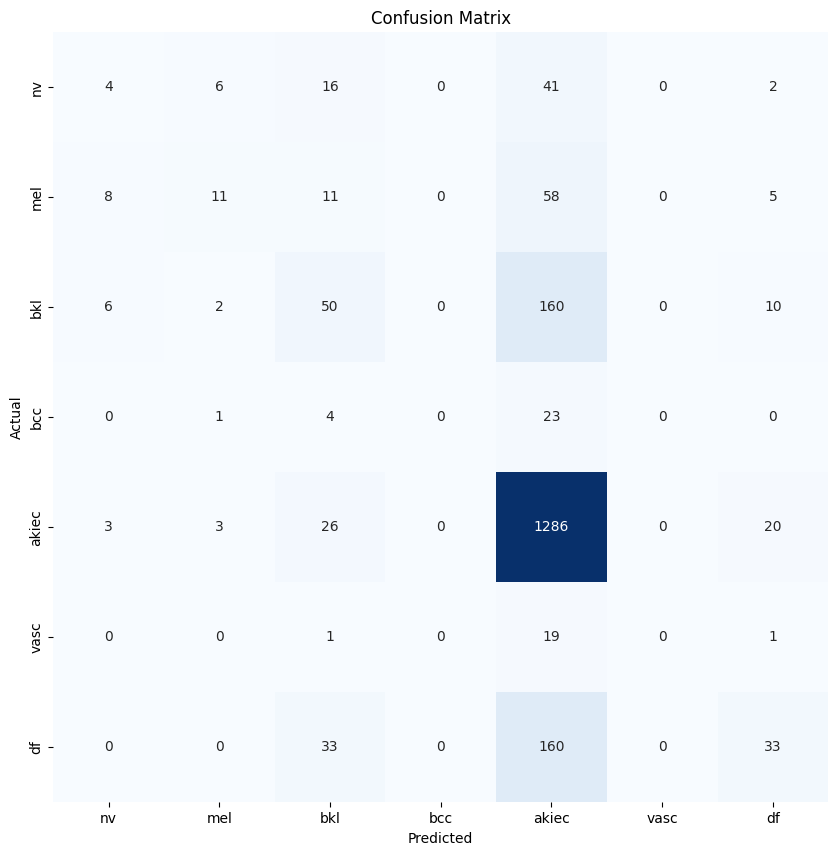

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')

plt.xticks(np.arange(7) + 0.5, label_mapping.values())
plt.xlabel("Predicted")

plt.yticks(np.arange(7) + 0.5, label_mapping.values())
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [60]:
print(clr)

              precision    recall  f1-score   support

          nv       0.19      0.06      0.09        69
         mel       0.48      0.12      0.19        93
         bkl       0.35      0.22      0.27       228
         bcc       0.00      0.00      0.00        28
       akiec       0.74      0.96      0.83      1338
        vasc       0.00      0.00      0.00        21
          df       0.46      0.15      0.22       226

    accuracy                           0.69      2003
   macro avg       0.32      0.21      0.23      2003
weighted avg       0.61      0.69      0.62      2003

